<a href="https://colab.research.google.com/github/ifygalie/Adegbite/blob/master/Gene_expression_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Load the data
df = pd.read_csv('/content/transomics.csv', index_col="genes") #uploads data & sets the index col to the "genes" column

In [3]:
#Inspect the data
df.dtypes #returns the numeric (float/integer) type in the data
df.shape #returns the dimensional (rows, cols) property of the data
df.isnull().sum() #returns the total 'n' of missing values in the data
df.head(4)

,WT_1,WT_2,WT_3,KO_1,KO_2,KO_3
genes,,,,,,
TSPAN6,7,7,12,11,19,10
TNMD,139,137,144,43,42,39
DPM1,1547,1509,1825,2282,2243,1729
SCYL3,303,279,360,260,261,210


In [4]:
print((df == 0).sum(axis=1)) #returns the total 'n' of zero values per row in the data
print((df == 0).sum()) #returns the total 'n' of zero values per column in the data

genes
TSPAN6        0
TNMD          0
DPM1          0
SCYL3         0
C1orf112      0
             ..
AL136419.1    5
AL691520.1    6
AC021097.2    5
AC003043.2    6
AP000646.1    0
Length: 33162, dtype: int64
WT_1    9270
WT_2    9702
WT_3    8845
KO_1    8902
KO_2    9045
KO_3    9646
dtype: int64


In [ ]:
#Clean the data

In [5]:
#Describe the data
df.describe()

,WT_1,WT_2,WT_3,KO_1,KO_2,KO_3
count,33162.000000,33162.000000,33162.000000,33162.000000,33162.000000,33162.000000
mean,767.681171,731.073156,961.345818,970.036156,921.945570,749.788191
std,3644.503320,3526.420543,4574.634625,4523.085799,4235.357537,3523.115863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,8.000000,8.000000,7.000000,6.000000
75%,461.000000,431.000000,575.000000,611.750000,574.000000,476.000000
max,361643.000000,343367.000000,440305.000000,403794.000000,367813.000000,306980.000000


In [6]:
#Transpose the data
dfT = df.T
dfT.head(4)

genes,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,POLR2J3,SOD2,AL162377.3,AC111006.1,AC093827.5,AL136419.1,AL691520.1,AC021097.2,AC003043.2,AP000646.1
WT_1,7,139,1547,303,1132,0,3,970,1343,962,...,92,0,0,24,1,0,0,0,0,10
WT_2,7,137,1509,279,1059,1,3,869,1280,918,...,98,0,1,17,6,0,0,5,0,6
WT_3,12,144,1825,360,1432,0,3,1052,1689,1227,...,87,0,0,13,9,0,0,0,0,6
KO_1,11,43,2282,260,1126,0,0,2308,1669,1177,...,111,6,0,12,5,1,0,0,0,12


In [7]:
print(dfT.index.names)

[None]


In [8]:
dfT = dfT.reset_index() # resets the index and move the original index to a new column named index by default. Sometimes, an extra index col is created ("level_0), "drop=True" function would remove the extra "level 0" col)
dfT.rename(columns={'index': 'genes'}, inplace=True) # renames the newly created column (which was the original index) to 'genes'.
dfT.set_index('genes', inplace=True) #sets 'genes' as the new index
print(dfT.index.names)

['genes']


In [9]:
dfT_sampled = dfT.sample(n=1000, axis=1, random_state=42)
dfT_sampled.head(4)

genes,RN7SL666P,NUS1P2,PTMAP3,RAPSN,BDH2P1,KNOP1,AC000032.1,CCDC47,AC005037.1,PGK1P2,...,CNIH4,IGF1,AL158032.2,OR2C1,AC084018.2,AC097494.1,RPL29P25,DUSP11,AC068831.6,AC004884.2
genes,,,,,,,,,,,,,,,,,,,,,
WT_1,0,117,0,1,0,2699,0,2782,8,2,...,2904,0,2,0,12,0,0,454,1,0
WT_2,0,89,0,0,0,2740,0,2798,9,1,...,2828,1,3,1,9,1,1,419,2,0
WT_3,0,158,2,0,0,3506,0,3562,13,4,...,3506,0,3,0,17,0,1,586,0,1
KO_1,0,80,0,1,0,3266,0,4543,16,1,...,2684,0,2,1,20,0,0,590,3,0


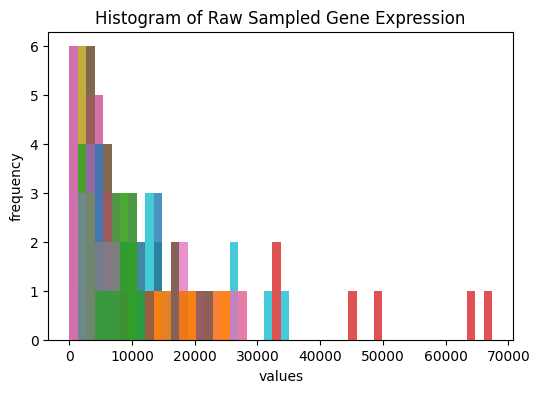

In [10]:
dfT_sampled.plot(kind="hist", bins=50, alpha=0.8, figsize=(6,4))
plt.xlabel("values")
plt.ylabel("frequency")
plt.title("Histogram of Raw Sampled Gene Expression")
plt.legend().remove()
plt.show()

In [14]:
#log transform the data
dfT_L = np.log1p(dfT)

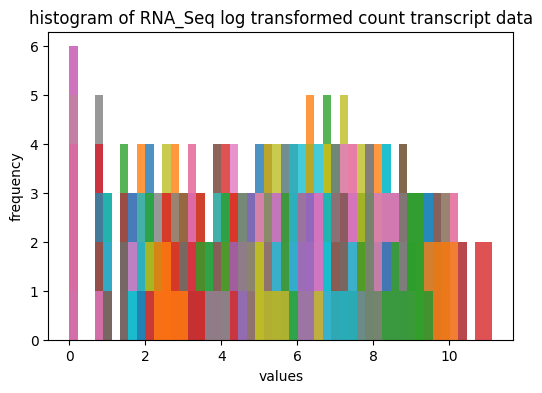

In [15]:
dfT_L_sampled = dfT_L.sample(n=1000, axis=1, random_state=42)
dfT_L_sampled.plot(kind="hist", bins=50, alpha=0.8, figsize=(6,4))
plt.xlabel("values")
plt.ylabel("frequency")
plt.title("histogram of RNA_Seq log transformed count transcript data")
plt.legend().remove()
plt.show()

In [16]:
#Normalise the data by PQN to adjust sample to sample variations
reference = dfT_L.median(axis=1) # Calculate the median along the columns for each gene
quotient = dfT_L.divide(reference, axis=0) # Divide each value by the median of its corresponding gene
quotient_median = quotient.median(axis=1) # Calculate the median ratio for each sample (across all  metabolites)
dfT_LP = dfT_L.divide(quotient_median, axis=0) # Divide each value by the median of its corresponding sample (normalizes each sample by dividing by its median ratio)

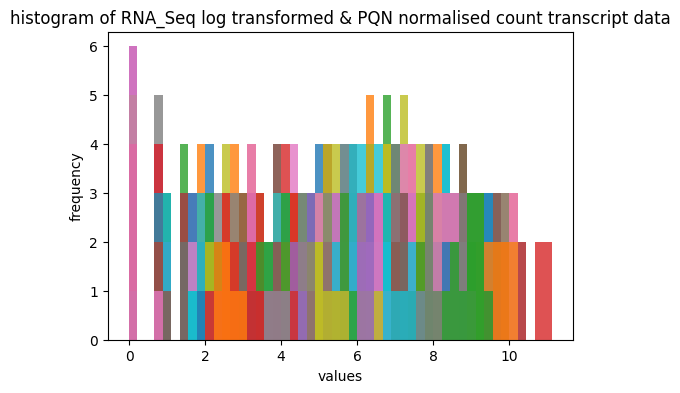

In [17]:
dfT_LP_sampled = dfT_LP.sample(n=1000, axis=1, random_state=42)
dfT_LP_sampled.plot(kind="hist", bins=50, alpha=0.8, figsize=(6,4))
plt.xlabel("values")
plt.ylabel("frequency")
plt.title("histogram of RNA_Seq log transformed & PQN normalised count transcript data")
plt.legend().remove()
plt.show()

In [18]:
dfT_LP.columns
dfT_LP.columns = dfT_LP.columns.astype(str)
dfT_LPS = pd.DataFrame(StandardScaler().fit_transform(dfT_LP), columns=dfT_LP.columns, index=dfT_LP.index)

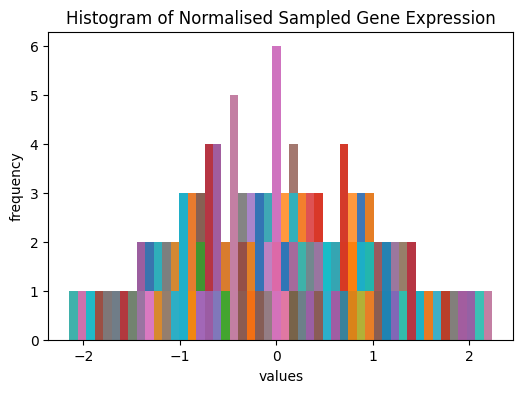

In [19]:
dfT_LPS_sampled = dfT_LPS.sample(n=1000, axis=1, random_state=42)
dfT_LPS_sampled.plot(kind="hist", bins=50, alpha=0.8, figsize=(6,4))
plt.xlabel("values")
plt.ylabel("frequency")
plt.title("Histogram of Normalised Sampled Gene Expression")
plt.legend().remove()
plt.show()

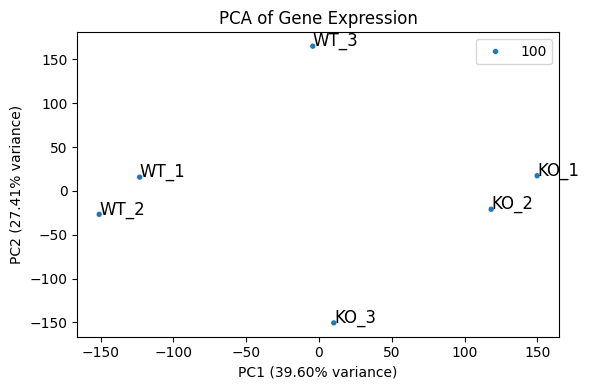

In [23]:
pca = PCA(n_components=2)
dfT_LPS_pca = pd.DataFrame(pca.fit_transform(dfT_LPS), columns=['PC1', 'PC2'], index=dfT_LPS.index)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=dfT_LPS_pca, x='PC1', y='PC2', size=100)
for i in dfT_LPS_pca.index:
    plt.text(dfT_LPS_pca.loc[i, 'PC1'] + 0.1, dfT_LPS_pca.loc[i, 'PC2'], i, fontsize=12)

plt.title('PCA of Gene Expression')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.grid(False)
plt.tight_layout()
plt.show()

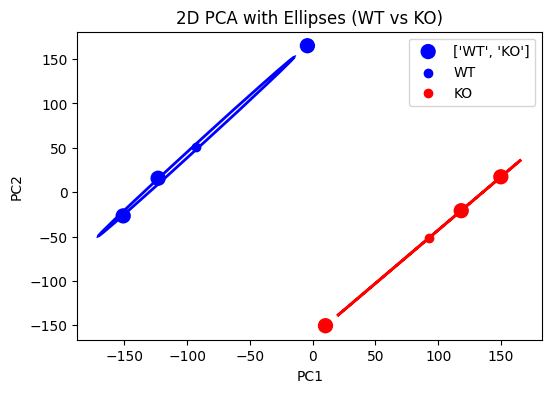

In [29]:
pca = PCA(n_components=2)
dfT_LPS_pca = pd.DataFrame(pca.fit_transform(dfT_LPS), columns=['PC1', 'PC2'], index=dfT_LPS.index)
fig, ax = plt.subplots(figsize=(6, 4))
# Access data using column names instead of numerical indices
ax.scatter(dfT_LPS_pca['PC1'], dfT_LPS_pca['PC2'], c=['blue']*3 + ['red']*3, label=['WT', 'KO'], s=100)
from matplotlib.patches import Ellipse
def plot_ellipse(x, y, ax, color, label):
    cov = np.cov(x, y)
    mean = [np.mean(x), np.mean(y)]
    eigvals, eigvecs = np.linalg.eigh(cov)
    angle = np.arctan2(eigvecs[1, 0], eigvecs[0, 0])
    #The assignment of ellipse was incorrectly indented, moved back one level
    ellipse = Ellipse(mean, width=2 * np.sqrt(eigvals[0]), height=2 * np.sqrt(eigvals[1]),
                      angle=np.degrees(angle), edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)
    ax.scatter(mean[0], mean[1], c=color, label=label)
# Access data using .loc or .iloc for Pandas DataFrames
wt_data = dfT_LPS_pca.loc[:dfT_LPS_pca.index[2], ['PC1', 'PC2']].values # Use .loc to select rows by label and columns by name, then .values to get a NumPy array
ko_data = dfT_LPS_pca.loc[dfT_LPS_pca.index[3]:, ['PC1', 'PC2']].values # Use .loc to select rows by label and columns by name, then .values to get a NumPy array
plot_ellipse(wt_data[:, 0], wt_data[:, 1], ax, 'blue', 'WT')
plot_ellipse(ko_data[:, 0], ko_data[:, 1], ax, 'red', 'KO')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('2D PCA with Ellipses (WT vs KO)')
ax.legend(loc='upper right')
plt.show()

In [ ]:
dfT_LPS_pca = dfT_LPS_pca.merge(metadata[['Group']], left_index=True, right_index=True) # Merge the 'Group' column from 'metadata' into 'dfT_LPS_pca' based on the index.
